In [9]:
import numpy as np
import matplotlib.pyplot as plt

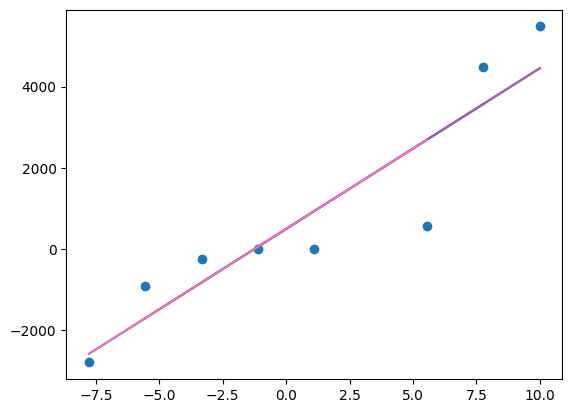

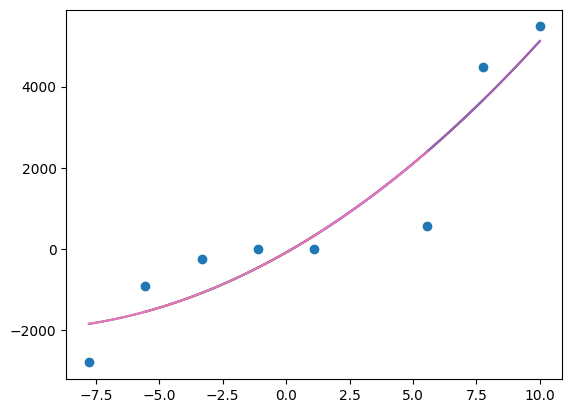

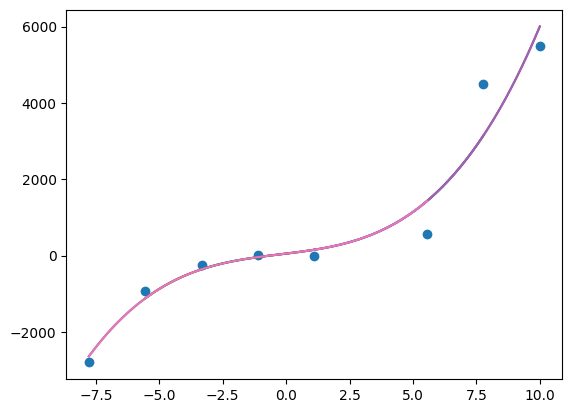

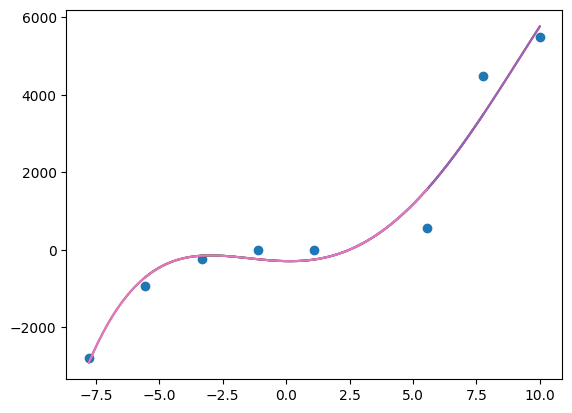

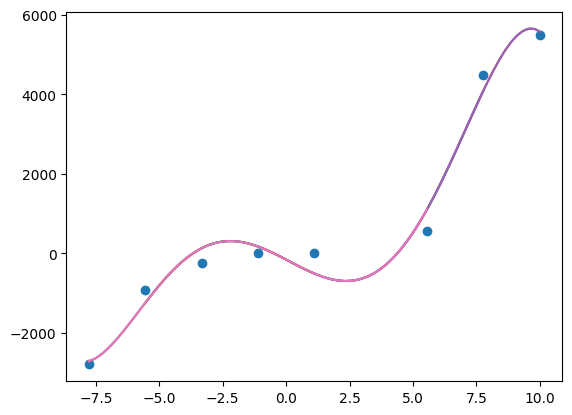

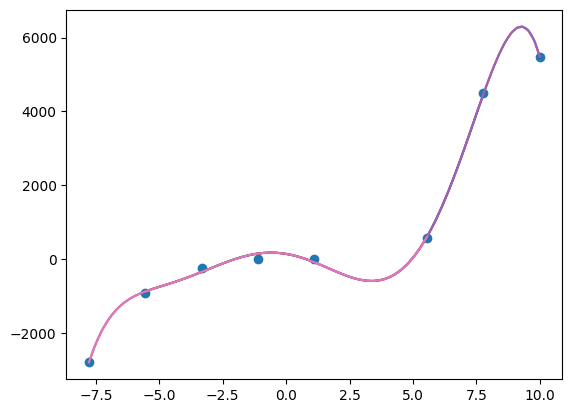

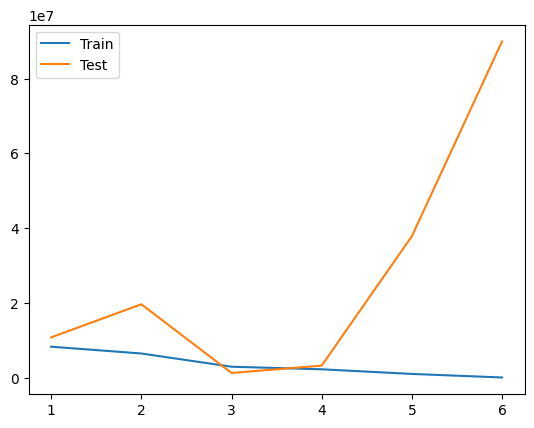

In [10]:
x1 = np.linspace(-10, 10, 10)
x2 = np.random.choice(x1, int(0.8*len(x1)), replace = False)
y = np.random.uniform(0, 10, int(0.8*len(x1))) * x2 ** 3 + np.random.uniform(0, 10, int(0.8*len(x1)))
x_test = np.setdiff1d(x1, x2)
y_test = np.random.uniform(0, 10, int(0.2*len(x1))) * x_test ** 3 + np.random.uniform(0, 10, int(0.2*len(x1)))

k = 6

order = np.arange(1, k+1)
error1 = np.zeros(k)
error2 = np.zeros(k)

for n in range(1, k + 1):
    V = np.empty([len(x2), n + 1])
    for i in range(n + 1):
        V[:, i] = x2 ** i

    Vt = np.transpose(V)
    A = Vt @ V
    Y = Vt @ y
    b = np.linalg.solve(A, Y)

    x = np.linspace(-20, 20, 50)
    Ps = np.zeros(len(x))
    for j in range(len(x)):
        p = 0
        for i in range(n + 1):
            p += b[i] * x[j] ** i
        Ps[j] = p
    plt.plot(x, Ps)

    for i in range(len(x2) - 1):
    

    Ps = np.zeros(len(x2))
    for j in range(len(x2)):
        p = 0
        for i in range(n + 1):
            p += b[i] * x2[j] ** i
        Ps[j] = p

    dif = np.subtract(Ps, y)
    squared = np.zeros(len(dif))
    for i in range(len(dif)):
        squared[i] = dif[i] ** 2
    error = np.sum(squared)

    error1[n - 1] = error

    Ps = np.zeros(len(x_test))
    for j in range(len(x_test)):
        p = 0
        for i in range(n + 1):
            p += b[i] * x_test[j] ** i
        Ps[j] = p
    plt.plot(x_test, Ps)
    plt.scatter(x2, y)
    plt.show()

    dif = np.subtract(Ps, y_test)
    squared = np.zeros(len(dif))
    for i in range(len(dif)):
        squared[i] = dif[i] ** 2
    error = np.sum(squared)

    error2[n - 1] = error

plt.show()

plt.plot(order, error1, label = "Train")
plt.plot(order, error2, label = "Test")
plt.xticks(np.arange(1, k+1))
plt.legend()
plt.show()